# Validation and parameters setting

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from textblob import TextBlob
from textblob import Word

In [2]:
%matplotlib notebook

In [3]:
#Connections with mongoDB collections
client = pymongo.MongoClient("mongodb://localhost:27017/")
mi_db = client["books"]

revsColec = mi_db["reviews"]
revsMetaColec = mi_db["revsmetadata"]
booksMetaColec = mi_db["booksmetadata"]

## Insert testing user' info in the database

In [20]:
#Reviews from testing users 
    '''
    {
                '_id': revIDs, 'revRat': revRats, 'revVotes': revVotess, 'revBody': revBodysOk, 'revRats': revRats,
                #'sent': sents, 'subj': subjs,
                'userID': userIDs, 'userName': userNames, 'userLocation': userLocationsOk,
                'bookID': bookIDs,  'bookISBN': bookISBNs, 'bookISBN13': bookISBN13s, 'bookTile': bookTitles,
                'bookAuthorID': bookAuthorIDs, 'bookAuthorName': bookAuthorNames, 'bookFormat': bookFormats, 
                'bookNpages': bookNpagess, 'bookAvgRating': bookAvgRatings, 'bookRatCount': bookRatCounts
                }
new_users = [
            {
            '_id': '4000000001', # Cuatro mil millones y uno
            'revBody': '''It's hard to say everything I think about this book. The first thing is that it is ultra 
            entertaining, it took me only 3 days to read it, and that was very busy with my work. 
            It is intelligent, surprising and with a perfect structure. And oh what happens near the end ... the universe 
            created by the writer feeds back creating a fascinating saga.''',
            'userID': '10000001', # Diez millones y uno
            'userName': 'A',
            'bookID':'10000001', # Diez millones y uno
            'bookTile':'Loba negra',
            'bookAuthorName':'Juan Gómez-Jurado'
            },{
            '_id': '4000000002', 
            'revBody': '''Something in the story made me feel like when I saw the movie One day
                        When you start reading this book you know one thing, Claudia is dying and this is her farewell. H
                        is desolation to feel that the end is near and can do nothing to prevent it. You read his story and 
                        his walk since he met Ismael, the love of his life.''',
            'userID': '10000002',
            'userName': 'B',
            'bookID':'10000002',
            'bookTile':'Quédate conmigo',
            'bookAuthorName': 'Lorena Franco'
            },{
            '_id': '4000000003', 
            'revBody': '''It seemed extremely short to me, the passion with which Chimamanda speaks of feminism is inspiring.
                    Feminism is not about what sex is superior, but rather letting go of the stereotypes and discrimination 
                    that a woman is subjected to simply because she is a woman. Fully recommended for those who want to know 
                    about feminism from an objective point of view''',
            'userID': '10000002',
            'userName': 'B',
            'bookID':'10000003',
            'bookTile': 'Todos deberíamos ser feministas',
            'bookAuthorName': 'Chimamanda Ngozi Adichie'
            },{
            '_id': '4000000004', 
            'revBody': '''Reading this book several thoughts presented themselves to me.
                        That Kate Bolick was not happy with one thing or the other, because every time she was reaching a 
                        point in her life she changed her mind and realized that it did not fill her, and that is why the 
                        story leads her to go from one relationship to another. But then I came to the thought, 
                        is it wrong to get out of situations that don't fill you up, where you don't feel complete? 
                        Sometimes you can be so clear about what you don't want more than what you do want. Kate in one way 
                        or another could feel identified with her alarm clocks, women who with her life experiences led her 
                        to form concepts to guide her life. "Blessed is he who finds his way forward and goes through it"''',
            'userID': '10000002',
            'userName': 'B',
            'bookID':'10000004',
            'bookTile': 'Solterona: La construcción de una vida propia',
            'bookAuthorName': 'Kate Bolick'
            },{
            '_id': '4000000005', 
            'revBody': '''I wanted to read something by this author and the truth is that it has impacted me. 
                    A haunting, puzzling, intriguing, and somewhat terrifying story. Also, since he doesn't go into detail 
                    or get his hands dirty, the whole story is even more unpredictable. If there is one thing that really 
                    scares and frightens it is mind control. I hope I don't have nightmares about this.''',
            'userID': '10000003',
            'userName': 'C',
            'bookID':'10000005',
            'bookTile':'La historia secreta del señor White',
            'bookAuthorName':'La historia secreta del señor White'
            },{
            '_id': '4000000006', 
            'revBody': '''I wanted to read it, a classic that I had never had the opportunity to have in my hands. 
                    But I did not like anything, I have not been able to finish it. It is not only the sordidness of the 
                    story but the way so cumbersome, rude (sometimes) and strange to tell everything. Surely the problem is 
                    mine that I do not appreciate the classics but I did not like this one at all.''',
            'userID': '10000003',
            'userName': 'C',
            'bookID':'10000006',
            'bookTile':'Luces de bohemia',
            'bookAuthorName':'Ramón del Valle-Inclán'
            },{
            '_id': '4000000007', 
            'revBody':'''A classic that he knew only by hearsay. Pretty boring, really. Perhaps seen represented the 
                    thing changes, but I did not like the reading.''',
            'userID': '10000003',
            'userName': 'C',
            'bookID':'10000007',
            'bookTile':'El perro del hortelano',
            'bookAuthorName':'Lope de Vega'
            },{
            '_id': '4000000008', 
            'revBody': '''The story is beautiful because it ends well, from time to time it is like that. The part of the war 
                    is interesting and especially the main character I think is full of nuances and lives up to his name 
                    the Fox. However, the style is really terrible, lots of typos, and when multiple characters step in, 
                    it's hard to know who's talking because there aren't many explanations. The story is fine, but the way of 
                    telling it is really improvable.''',
            'userID': '10000003',
            'userName': 'C',
            'bookID':'10000008',
            'bookTile':'El Morisco de Annual',
            'bookAuthorName':'JJ Gomez-Chosly'
            },{
            '_id': '4000000009', 
            'revBody': '''Fast-paced rhythm that engages from the first moment. Ugly, dark, sad characters, 
                    some amazing antiheroes. A different story with an ending that leaves the heart in a fist''',
            'userID': '10000003',
            'userName': 'C',
            'bookID':'10000009',
            'bookTile':'El escultor de cadáveres',
            'bookAuthorName':'César García Muñoz'
            },{
            '_id': '4000000010', 
            'revBody': '''It is a very pleasant reading where you read how the characters face their love lives, where I could 
                    not help thinking of various situations that I read that moments like this happen in real life''',
            'userID': '10000004',
            'userName': 'D',
            'bookID':'10000010',
            'bookTile':'El amor huele a café',
            'bookAuthorName':'Nieves García Bautista'
            },{
            '_id': '4000000011', 
            'revBody': '''A mother and her son who are sharing pages in a different story each one although parallel, 
                    without very little dialogue throughout the book and written in short sentences with continuous 
                    changes and in a somewhat unusual tone for my way of understanding.''',
            'userID': '10000005',
            'userName': 'E',
            'bookID':'10000011',
            'bookTile':'Amor (Nefelibata)',
            'bookAuthorName':'Hanne Ørstavik'
            },{
            '_id': '4000000012', 
            'revBody': '''Two parallel but intertwined points, one futuristic and the other current, entertaining, 
                    but all very rare.''',
            'userID': '10000005',
            'userName': 'E',
            'bookID': '10000012',
            'bookTile': 'El ruido del fin del mundo',
            'bookAuthorName': 'Leticia Martín Hernández'
            },{
            '_id': '4000000013', 
            'revBody': '''Well written and at times dense and dramatic, which makes everything a little forced at times.''',
            'userID': '10000005',
            'userName': 'E',
            'bookID':'10000013',
            'bookTile':'La isla de las musas',
            'bookAuthorName':'Verónica García-Peña'
            },{
            '_id': '4000000014', 
            'revBody': '''Very good and a detailed description of how the historical events could have occurred in such an 
                    important change in the change of life in the Iberian Peninsula. I hope that the author continues 
                    with the story.''',
            'userID': '10000006',
            'userName': 'F',
            'bookID':'10000014',
            'bookTile':'El reino imposible',
            'bookAuthorName':'Yeyo Balbás'
            },{
            '_id': '4000000015', 
            'revBody': '''Very good intrigue novel and a solemn setting. I will follow this author''',
            'userID': '10000006',
            'userName': 'F',
            'bookID':'10000015',
            'bookTile':'Azul Venezia',
            'bookAuthorName':'Marina G. Torrús'
            },{
            '_id': '4000000016', 
            'revBody': '''I have not seen the film, but the novel is extraordinary especially for those of us who like thermodynamics, 
                    although it can be read the same if you do not understand anything about it.''',
            'userID': '10000006',
            'userName': 'F',
            'bookID':'10000016',
            'bookTile':'El marciano',
            'bookAuthorName':'Andy Weir'
            },{
            '_id': '4000000017', 
            'revBody': '''The theme gives much more. I see that it lacks background and documentation of the time that 
                    there would be for many novels. The intention is good and the language is very simple, sometimes you 
                    don't know what time you're in. Sorry, I couldn't finish it.''',
            'userID': '10000006',
            'userName': 'F',
            'bookID':'10000017',
            'bookTile':'Cincuenta caballeros',
            'bookAuthorName':'Teresa Ricardo'
            },{
            '_id': '4000000018', 
            'revBody': '''It's fast-paced from start to finish, you can't stop reading until it's done. I hope it will be a 
                    long series because you are waiting for new adventures from Riley.'',
            'userID': '10000006',
            'userName': 'F',
            'bookID':'10000018',
            'bookTile':'Tinieblas',
            'bookAuthorName':'Fernando Gamboa'
            }
    ]
# Insert info in the DB
revsColec.insert_many(new_users)'''

SyntaxError: invalid syntax (<ipython-input-20-b2b19855b533>, line 195)

## Get emotions from testing users' info and update the collection

In [4]:
#Needed functions from previous notebooks to get metada for the reviews
def getSentSubj(texto):
    
    blob = TextBlob(texto)
    sent = blob.sentiment.polarity
    subj = blob.sentiment.subjectivity
    
    return sent, subj

def getEmomatrix(texto):
    
    # Get the Emotion-Lexicon and make a dummy emotion table for each word in it
    nrcDF = pd.read_table('NRC-Emotion-Lexicon-Wordlevel-v0.92.txt')
    mask = nrcDF['Score'] == 1
    dummiesDF = pd.get_dummies(nrcDF[mask].Emotion)
    nrcDFDummiesDF = nrcDF.drop(['Emotion', 'Score'], axis = 1).join(dummiesDF)
    groupedDF = nrcDFDummiesDF.groupby('Word').sum().astype(int)

    # Read the stop-words list, and remove them from the test
    stopWords = list(pd.read_table('eng_stop-wods.txt')['WORD'])
    cleanText = (' ').join([word.lower() for word in texto.split() if word not in stopWords])
    print('Sin stop-word:', cleanText)
                     
    # Lemmatize the result
    sentence = TextBlob(cleanText)
    lemms = [Word(word).lemmatize() for word in sentence.words]
    print('Lematizado', lemms)
                     
    # Get the signinificative emotional words
    emoWords = set(lemms).intersection(set(nrcDF['Word']))
                     
    # For each emotional word, count the score for each sentiment (emo-matrix of the text)
    dicc = {}
    for word in emoWords:
        dicc[word] = lemms.count(word)
    dicc2 = {}
    for k, v in list(dicc.items()):
        dicc2[k] = list(groupedDF.loc[k]*v)
        
    # Get the emo-matrix of the text (emotion score for each word in the text)
    emoDF = pd.DataFrame(dicc2, index = list(groupedDF.columns))
    
    # Add the sum (#and relative sum) for each emotion in the whole text (emo-vector of the text) 
    emoDF['Sum'] = emoDF.sum(axis=1)
    emoDF['SumRel'] = emoDF['Sum'] / emoDF['Sum'].sum()      
    return emoDF

def getMetadata(texto):
    
    tx = str(texto)
    return  getSentSubj(tx)[0], getSentSubj(tx)[1], list(getEmomatrix(tx).T.iloc[-1])

def toEng(texto):
    
    blob = TextBlob(texto)
    try:
        if blob.detect_language == 'en':
            return str(texto)
        else: 
            return str(blob.translate(to = 'en'))
    except:
        return str(texto)

In [5]:
#Update the metadada mongoDB collection
def updateRevsmetadata():
    
    n = 1
    lista = ['4000000014',  '4000000015', '4000000016', '4000000017', '4000000018']
    for ident in lista:
        review = revsColec.find_one( {'_id': ident}, {'userID': 1, 'bookID': 1, 'revBody': 1} )
        
        # Insert document for each review, to be able to get average metadata for each user and book
        # Translate into English if needed
        enRev = toEng(review['revBody']) 
        
        revSentValue, revSubjValue, revEmoValue = getMetadata(enRev)
        revEmoDict = {'anger': revEmoValue[0], 
                      'anticipation': revEmoValue[1],
                      'disgust': revEmoValue[2],
                      'fear': revEmoValue[3],
                      'joy': revEmoValue[4],
                      'negative': revEmoValue[5],
                      'positive': revEmoValue[6],
                      'sadness': revEmoValue[7],
                      'surprise': revEmoValue[8],
                      'trust': revEmoValue[9] }
        
        v =  { '_id': review['_id'], 'userID': review['userID'], 'bookID': review['bookID'],
            'revSent':revSentValue, 'revSubj': revSubjValue, 'revEmo': revEmoDict }
        
        try:
            revsMetaColec.insert_one(v)
            print('Insertion in revsmetadata:', n)
        except:
            print('Insertion failed:', n)
            
        n += 1 
        print(v)
    print('Done')

In [83]:
updateRevsmetadata()

Sin stop-word: very good detailed description historical events could occurred important change change life iberian peninsula. i hope author continues story.
Lematizado ['very', 'good', 'detailed', 'description', 'historical', 'event', 'could', 'occurred', 'important', 'change', 'change', 'life', 'iberian', 'peninsula', 'i', 'hope', 'author', 'continues', 'story']
Insertion in revsmetadata: 1
{'_id': '4000000014', 'userID': '10000006', 'bookID': '10000014', 'revSent': 0.34199999999999997, 'revSubj': 0.6060000000000001, 'revEmo': {'anger': 0.0, 'anticipation': 0.125, 'disgust': 0.0, 'fear': 0.125, 'joy': 0.125, 'negative': 0.0, 'positive': 0.25, 'sadness': 0.0, 'surprise': 0.125, 'trust': 0.25}}
Sin stop-word: very good intrigue novel solemn setting. i follow author
Lematizado ['very', 'good', 'intrigue', 'novel', 'solemn', 'setting', 'i', 'follow', 'author']
Insertion in revsmetadata: 2
{'_id': '4000000015', 'userID': '10000006', 'bookID': '10000015', 'revSent': 0.9099999999999999, 're

## Get reviews and synopsis updated with the testing user's info

In [6]:
#Load revisions into DataFrame
revsMetaDF = pd.DataFrame(revsMetaColec.find())
emoDict = revsMetaDF['revEmo'].values
emoList = emoDict.tolist()
emoDF = pd.DataFrame(emoList)
emoAvgDF = emoDF.div(emoDF.sum(axis=1), axis=0).fillna(0)
revsMetaDF = pd.concat([revsMetaDF.loc[:, revsMetaDF.columns != 'revEmo'], emoAvgDF], axis = 1).sort_values(['bookID', 'userID'])
revsMetaDF.iloc[:5,]

,_id,userID,bookID,revSent,revSubj,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
9530,3266054823,107601413,1,0.700000,0.600000,0.0,0.200000,0.0,0.0,0.200000,0.0,0.200000,0.0,0.200000,0.200000
10294,3266695962,27488741,1,0.400000,0.625000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
9501,3266043633,67012921,1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
5793,3259466750,93669131,1,0.716667,0.566667,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.000000
11120,4000000001,10000001,10000001,0.353485,0.601364,0.0,0.142857,0.0,0.0,0.142857,0.0,0.428571,0.0,0.071429,0.214286


In [7]:
#Exclude revisions according to an alpha value
alpha = 10
maskRevs1 = revsMetaDF['revSent']< 0
maskRevs2 = revsMetaDF['positive']-revsMetaDF['negative'] > 0
maskRevs3 = (revsMetaDF['positive']- revsMetaDF['negative'])/(alpha * -revsMetaDF['revSent']) < 1 
revsMetaDF = revsMetaDF[~(maskRevs1 & maskRevs2 & maskRevs3)]
revsMetaDF.iloc[:5,:]

,_id,userID,bookID,revSent,revSubj,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
9530,3266054823,107601413,1,0.700000,0.600000,0.0,0.200000,0.0,0.0,0.200000,0.0,0.200000,0.0,0.200000,0.200000
10294,3266695962,27488741,1,0.400000,0.625000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
9501,3266043633,67012921,1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
5793,3259466750,93669131,1,0.716667,0.566667,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.000000
11120,4000000001,10000001,10000001,0.353485,0.601364,0.0,0.142857,0.0,0.0,0.142857,0.0,0.428571,0.0,0.071429,0.214286


In [8]:
#Load synopsis into DataFrame 
booksMetaDF = pd.DataFrame(booksMetaColec.find())
emoDict = booksMetaDF['descrEmo'].values
emoList = emoDict.tolist()
emoDF = pd.DataFrame(emoList)
emoAvgDF = emoDF.div(emoDF.sum(axis=1), axis=0).fillna(0)
booksMetaDF = pd.concat([booksMetaDF.loc[:, booksMetaDF.columns != 'descrEmo'], emoAvgDF], axis = 1).sort_values('_id')
booksMetaDF.iloc[:5,]

,_id,descrSent,descrSubj,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
5161,1,0.016425,0.677778,0.112000,0.072000,0.064000,0.088000,0.024000,0.216000,0.136000,0.136000,0.064000,0.088000
924,1001506,-0.125000,0.375000,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.200000,0.066667,0.066667,0.200000
5327,1002520,0.300000,1.000000,0.133333,0.100000,0.033333,0.133333,0.066667,0.133333,0.100000,0.133333,0.000000,0.166667
2599,10032454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5277,1003759,0.218750,0.631250,0.000000,0.111111,0.055556,0.055556,0.166667,0.111111,0.277778,0.000000,0.055556,0.166667


## Get recommendations for new users

In [9]:
#Needed functions from previous notebooks to get metrics
def cos(DF1, id1, DF2, id2):
    
    order = ['anger','disgust','sadness','surprise','fear','trust', 'joy','anticipation']
    arr1 = DF1[DF1['_id'] == id1][order].squeeze()
    arr2 = DF2[DF2['_id'] == id2][order].squeeze()
    return arr1.dot(arr2) / (arr1.dot(arr1)*arr2.dot(arr2))**0.5

def distEuc(DF1, id1, DF2, id2):
    
    order = ['anger','disgust','sadness','surprise','fear','trust', 'joy','anticipation']
    arr1 = DF1[DF1['_id'] == id1][order].squeeze()
    arr2 = DF2[DF2['_id'] == id2][order].squeeze()
    dif = arr1 - arr2
    return dif.dot(dif)**0.5

def pearson(DF1, id1, DF2, id2):
    
    order = ['anger','disgust','sadness','surprise','fear','trust', 'joy','anticipation']
    arr1 = DF1[DF1['_id'] == id1][order].squeeze()
    arr2 = DF2[DF2['_id'] == id2][order].squeeze()
    return np.corrcoef(arr1, arr2)[0, 1]

def metric(DF1, id1, DF2, id2, metr):
    if metr == 'pearson':
        return pearson(DF1, id1, DF2, id2)
    elif metr == 'distEuc':
        return distEuc(DF1, id1, DF2, id2)
    else:
        return cos(DF1, id1, DF2, id2)

In [10]:
#Needed functions from previous notebooks to get explanation sentences
def getExplanation(readBookID, readAuthorID, emo1, emo2, recBookID, recAuthorID):
    
    emosDict = {'anger': 'anger', 'disgust': 'disgust', 'sadness': 'sadness', 'surprise': 'surprise', 'fear': 'fear', 
              'trust': 'trust',  'joy': 'joy','anticipation': 'anticipation'}
    sentences = [
        'You enjoyed reading %s by %s and feeling %s and %s. So, you could read %s by %s',
        'If you want to feel again the %s and %s that you felt reading %s by %s, consider reading %s by %s',
        'Reading %s by %s, you can have the same experience of %s and %s that you had reading %s by %s.',
        'In %s by %s you can have as much %s and %s as you had in %s by %s ',
        'Didn\'t you have enough %s and %s with %s by %s? Go for %s by %s'
            ]
    orders = [
            (readBookID, readAuthorID, emosDict[emo1], emosDict[emo2], recBookID, recAuthorID ),
            (emosDict[emo1], emosDict[emo2], readBookID, readAuthorID, recBookID, recAuthorID ),
            (recBookID, recAuthorID, emosDict[emo1], emosDict[emo2], readBookID, readAuthorID),
            (recBookID, recAuthorID, emosDict[emo1], emosDict[emo2], readBookID, readAuthorID),
            (emosDict[emo1], emosDict[emo2], readBookID, readAuthorID, recBookID, recAuthorID )
            ]
    
    ind = np.random.randint(len(sentences), size=1)[0]
#    print(sentences[ind] % orders[ind])
    return sentences[ind] % orders[ind]

In [11]:
#Needed functions from previous notebooks to get a recommendation from reviews
def getRecsRevs(userID, threshold, met='cos'):
        
    userDF = revsMetaDF[revsMetaDF['userID']== userID]
    userRevIDs = userDF['_id']
    lista = []
    while len(lista) < 1:
        ind2 = np.random.randint(len(revsMetaDF), size = 1)[0]
        revID2 = revsMetaDF.iloc[ind2]['_id']
        ind1 = np.random.randint(len(userDF), size = 1)[0]
        revID1 = userDF.iloc[ind1]['_id']
        if revID2 in userRevIDs: continue
        met_val = metric(revsMetaDF, revID1, revsMetaDF, revID2, met)
        if met_val != met_val: continue
        if met == 'distEuc':
            if met_val <= threshold:
                lista.append([revID1, revID2, met_val])   
        else:
            if met_val >= threshold:
                lista.append([revID1, revID2, met_val])           
    resultDF = pd.DataFrame()
    i = 0
    for item in lista:
        book = revsColec.find_one({'_id': item[1]}, 
                            {'userID': 1, 'bookID': 1, 'bookTile': 1, 'bookAuthorName': 1})
        user_info = revsColec.find_one({'_id': item[0]}, {'bookTile': 1, 'bookAuthorName': 1})
        
        maxEmos = revsMetaDF.loc[revsMetaDF['_id']== item[1]] [['anger','disgust','sadness','surprise','fear','trust', 
                    'joy','anticipation']].squeeze().sort_values(ascending=False)[:2].index
        
        explan = getExplanation( user_info['bookTile'], user_info['bookAuthorName'], maxEmos[0], maxEmos[1], 
                    book['bookTile'], book['bookAuthorName'] )
         
        resultDF[i] = [item[0], user_info['bookTile'],user_info['bookAuthorName'], item[1],
                        book['bookID'], book['bookTile'], book['bookAuthorName'], item[2], explan]

        i += 1
    resultDF = resultDF.T
    resultDF.columns = ['userReadingID', 'userReadingTitle','userReadingAuthor','revID','bookRecomID', 'bookRecomTitle', 
                        'bookRecomAuthor', met, 'Explanation']
    return resultDF.sort_values(met, ascending = False)

In [12]:
#Needed functions from previous notebooks to get a recommendation from synopsis
def getRecsBooks(userID, threshold, met='cos'):
        
    userDF = revsMetaDF[revsMetaDF['userID']== userID]
    userBooksIDs = userDF['bookID']
    lista = []
    while len(lista) < 1:
        ind2 = np.random.randint(len(booksMetaDF), size = 1)[0]
        revID2 = booksMetaDF.iloc[ind2]['_id']
        ind1 = np.random.randint(len(userDF), size = 1)[0]
        revID1 = userDF.iloc[ind1]['_id']
        if revID2 in userBooksIDs: continue
        met_val = metric(revsMetaDF, revID1, booksMetaDF, revID2, met)
        if met_val != met_val: continue
        if met == 'distEuc':
            if met_val <= threshold:
                lista.append([revID1, revID2, met_val])   
        else:
            if met_val >= threshold:
                lista.append([revID1, revID2, met_val])           
    resultDF = pd.DataFrame()
    i = 0
    for item in lista:
        book = revsColec.find_one({'bookID': item[1]}, 
                            {'userID': 1, 'bookID': 1, 'bookTile': 1, 'bookAuthorName': 1})
        user_info = revsColec.find_one({'_id': item[0]}, {'bookTile': 1, 'bookAuthorName': 1})
        
        maxEmos = booksMetaDF.loc[booksMetaDF['_id']== item[1]] [['anger','disgust','sadness','surprise','fear','trust', 
                    'joy','anticipation']].squeeze().sort_values(ascending=False)[:2].index
        
        explan = getExplanation( user_info['bookTile'], user_info['bookAuthorName'], maxEmos[0], maxEmos[1], 
                    book['bookTile'], book['bookAuthorName'] )
         
        resultDF[i] = [item[0], user_info['bookTile'],user_info['bookAuthorName'], 
                       item[1], book['bookTile'], book['bookAuthorName'], item[2], explan]

        i += 1
    resultDF = resultDF.T
    resultDF.columns = ['userReadingID', 'userReadingTitle','userReadingAuthor', 'bookRecomID', 'bookRecomTitle', 
                        'bookRecomAuthor', met, 'Explanation']

    return resultDF.sort_values(met, ascending = False)

In [15]:
# This code has to be run for each alpha value to get a set of testing recommendations

usID = '10000004'

print(getRecsRevs(usID, 0.9, 'cos')['bookRecomTitle'][0])
print(getRecsBooks(usID, 0.9, 'cos')['bookRecomTitle'][0])
print(getRecsRevs(usID, 0.95, 'cos')['bookRecomTitle'][0])
print(getRecsBooks(usID, 0.95, 'cos')['bookRecomTitle'][0])

print(getRecsRevs(usID, 0.9, 'distEuc')['bookRecomTitle'][0])
print(getRecsBooks(usID, 0.9, 'distEuc')['bookRecomTitle'][0])
print(getRecsRevs(usID, 0.95, 'distEuc')['bookRecomTitle'][0])
print(getRecsBooks(usID, 0.95, 'distEuc')['bookRecomTitle'][0])

print(getRecsRevs(usID, 0.9, 'Pearson')['bookRecomTitle'][0])
print(getRecsBooks(usID, 0.9, 'Pearson')['bookRecomTitle'][0])
print(getRecsRevs(usID, 0.95, 'Pearson')['bookRecomTitle'][0])
print(getRecsBooks(usID, 0.95, 'Pearson')['bookRecomTitle'][0])


C:\Users\NITROPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


Akata Witch (Akata Witch, #1)
Dear Worst Enemy (The Matchmaker Series)
Tempest (Old West, #3)
The Great Gatsby
The Giver of Stars
Miranda (Mail-Order Brides of Sapphire Springs, #1; Brides of Beckham)
Real Life
Thornton: Her Moody Billionaire Rancher Boss (Secret Tycoons of Wyoming Book 2)
Crown of Midnight (Throne of Glass, #2)
Wally Roux, Quantum Mechanic
Little Fires Everywhere
Project Hero


# Testing and comparing retrieving times for the three metrics considered

In [23]:
usID = '10000002'
for met in ['cos', 'distEuc', 'Pearson']:
    for tim in [0.8, 0.85, 0.9, 0.95, 0.99]:
        print(tim, met)
        %timeit getRecsRevs(usID, tim, met)

0.8 cos


C:\Users\NITROPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


120 ms ± 29.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
0.85 cos
The slowest run took 6.75 times longer than the fastest. This could mean that an intermediate result is being cached.
201 ms ± 138 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
0.9 cos


KeyboardInterrupt: 

In [15]:
#Get a set of measures for each metric, getting recommendations from reviews
# vaLues for beta = 0.8, 0.9, 0.95, 0.99
# in ms
meansRevs = {}
stdsRevs = {}
meansRevs['cos'] = [58, 102, 146, 149, 4150]
stdsRevs['cos'] = [18.4, 17.6, 152, 107, 2920]

meansRevs['distEuc'] = [48.8, 44.2, 48.6, 46.9, 46.7] 
stdsRevs['distEuc'] = [2.52, 5.58, 3.11, 4.82, 4.34]

meansRevs['Pearson'] = [93.4, 118, 144, 329, 4010]
stdsRevs['Pearson'] = [16.8, 17.4, 18.4, 95.7, 2540]
RevsTimesMeansDF = pd.DataFrame(meansRevs)

RevsTimesMeansDF = pd.DataFrame(meansRevs)
RevsTimesMeansDF.index = [0.8, 0.85, 0.9, 0.95, 0.99]

In [165]:
#timeit magic Jupyter function for each metric and getting a review from user's reviews and 
#from synopsis of the books for this random user
usID = '10000001'
for met in ['cos', 'distEuc', 'Pearson']:
    for tim in [0.8, 0.85, 0.9, 0.95, 0.99]:
        print(tim, met)
        %timeit getRecsBooks(usID, tim, met)

0.8 cos


C:\Users\NITROPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


97.2 ms ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.85 cos
135 ms ± 31.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.9 cos
190 ms ± 29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.95 cos
The slowest run took 11.40 times longer than the fastest. This could mean that an intermediate result is being cached.
403 ms ± 256 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
0.99 cos
The slowest run took 28.27 times longer than the fastest. This could mean that an intermediate result is being cached.
14.1 s ± 12.2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
0.8 distEuc
59.9 ms ± 3.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.85 distEuc
55.3 ms ± 3.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.9 distEuc
58.2 ms ± 4.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.95 distEuc
56.7 ms ± 5.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.99 distEuc
61.7 ms ± 2.74 ms per loop (mean ± st

In [13]:
#Get a set of measures for each metric, getting recommendations from synopsis
# vaLues for beta = 0.8, 0.9, 0.95, 0.99
# in ms
meansBooks = {}
stdsBooks = {}

meansBooks['cos'] = [97.2, 135, 190, 403, 14100]
stdsBooks['cos'] = [14.3, 31.9, 29, 256, 12200]

meansBooks['distEuc'] = [59.9, 55.3, 58.2, 56.7, 61.7] 
stdsBooks['distEuc'] = [3.05, 3.72, 4.73, 5.28, 2.74]

meansBooks['Pearson'] = [82.3, 119, 164, 673, 7480]
stdsBooks['Pearson'] = [25.3, 14.3, 120, 129, 4610]

BooksTimesMeansDF = pd.DataFrame(meansBooks)
BooksTimesMeansDF.index = [0.8, 0.85, 0.9, 0.95, 0.99]

<IPython.core.display.Javascript object>


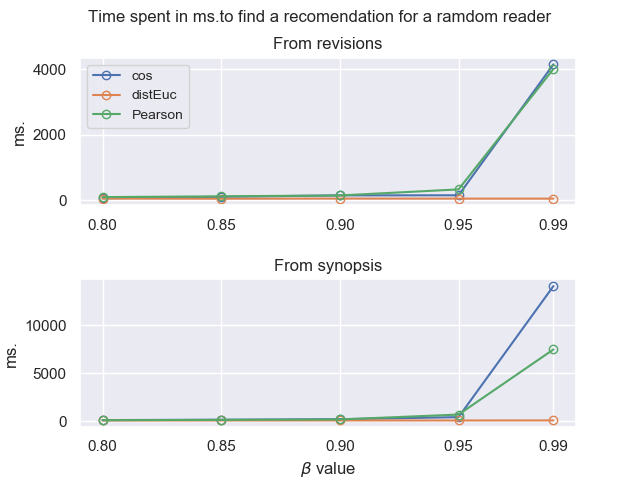

Text(0, 0.5, 'ms.')

In [30]:
#Plot both line graphs, times for the three metrics from revisions and from synopsis
fig , axes = plt.subplots(2, 1)
fig.suptitle('Time spent in ms.to find a recomendation for a ramdom reader')
plt.subplots_adjust(hspace=0.5)
plt.rc('legend',fontsize=10)
ax1 = RevsTimesMeansDF.plot(ax = axes[0], xticks=[0.8, 0.85, 0.9, 0.95, 0.99], title='From revisions', 
                            marker = 'o', fillstyle='none')
ax1.set_ylabel('ms.')
ax2 = BooksTimesMeansDF.plot(ax = axes[1], xticks=[0.8, 0.85, 0.9, 0.95, 0.99], title='From synopsis', legend = False,
                            marker = 'o', fillstyle='none')
ax2.set_xlabel(r'$\beta$ value')
ax2.set_ylabel('ms.')